In [230]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns


In [231]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
result_data = pd.read_csv('sample_submission.csv')

In [232]:
print(train_data.shape)
print(test_data.shape)

(3000, 23)
(4398, 22)


In [233]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [234]:
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [235]:
# Elements with missing values

In [236]:
i = 0
missing_train = []
for x in train_data.isnull().sum():
    if(x != 0):
        missing_train.append(train_data.columns[i])
    i+=1
print(missing_train)

['belongs_to_collection', 'genres', 'homepage', 'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime', 'spoken_languages', 'tagline', 'Keywords', 'cast', 'crew']


In [237]:
i = 0
missing_test = []
for x in test_data.isnull().sum():
    if(x != 0):
        missing_test.append(test_data.columns[i])
    i+=1
print(missing_test)

['belongs_to_collection', 'genres', 'homepage', 'overview', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew']


In [238]:
for x in missing_test:
    if(x not in missing_train):
        print(x)
for x in missing_train:
    if(x not in missing_test):
        print(x)

release_date
status
title


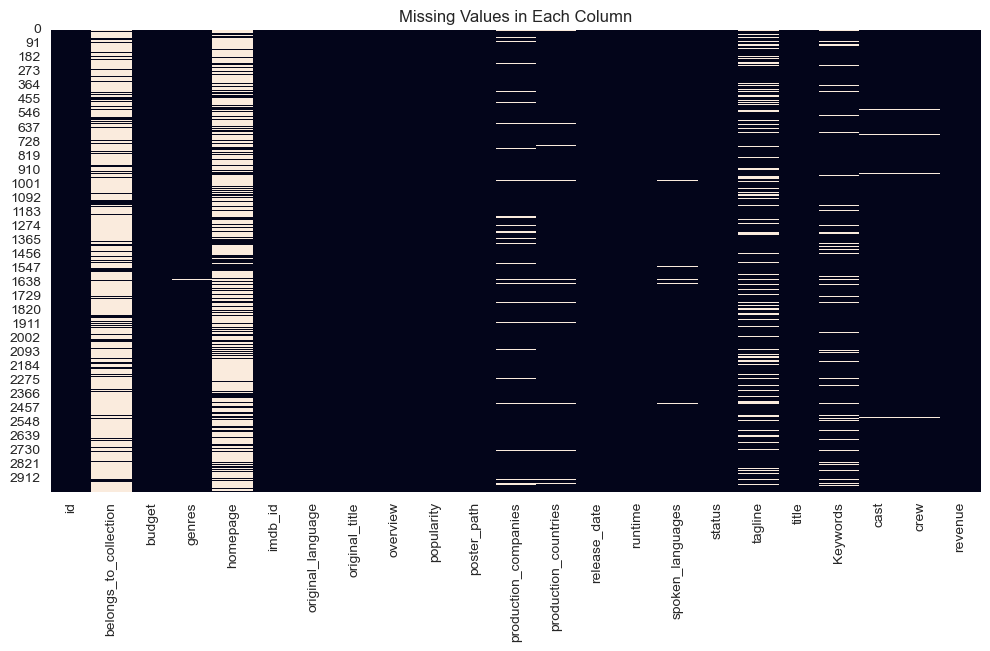

In [239]:
plt.figure(figsize=(12,6))
sns.heatmap(train_data.isnull(), cbar=False)
plt.title("Missing Values in Each Column")
plt.show()

In [240]:
train_data.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [241]:
# Missing value filling
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')

print(train_data['runtime'].isnull().sum())
print(test_data['runtime'].isnull().sum())
train_data['runtime'] = imp.fit_transform(train_data[['runtime']])
test_data['runtime'] = imp.fit_transform(test_data[['runtime']])

print(train_data['runtime'].isnull().sum())
print(test_data['runtime'].isnull().sum())

2
4
0
0


In [242]:
train_data['genres']

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2995    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2996    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2997    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2998    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2999    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 3000, dtype: object

In [243]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['genres']
one_hot = OneHotEncoder()
transformed = ColumnTransformer([("one_hot",one_hot,categorical_features)], remainder='passthrough')

In [244]:
# Labels extrahieren
y = train_data["revenue"]
y_test = result_data["revenue"]

In [245]:
print(y.shape)
print(y_test.shape)

(3000,)
(4398,)


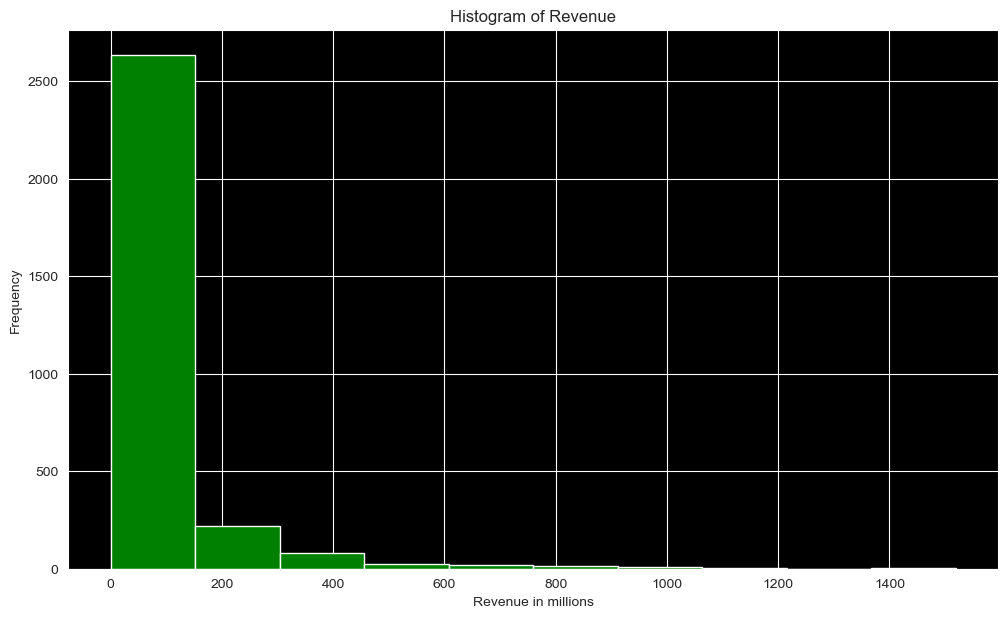

In [246]:
plt.figure(figsize=(12, 7))
plt.axes().set_facecolor("black")
plt.hist(train_data['revenue']/1_000_000, bins=10, color='green', edgecolor='white' ) 

plt.xlabel('Revenue in millions')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

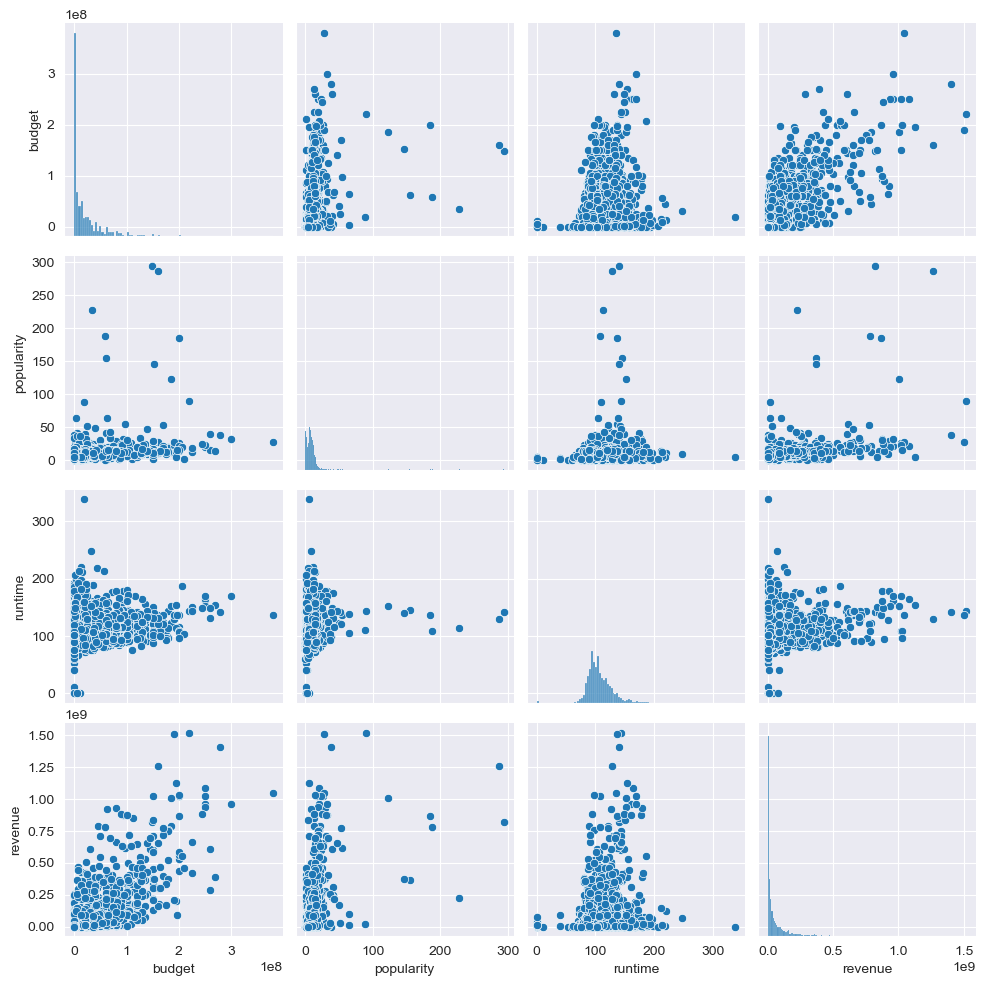

In [247]:
sns.pairplot(train_data[['budget', 'popularity', 'runtime', 'revenue']])
plt.show()

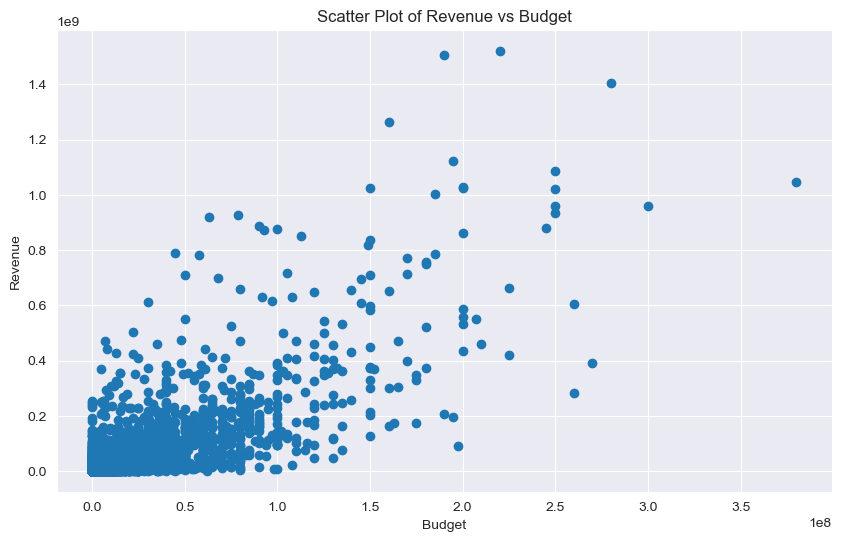

In [248]:
plt.figure(figsize=(10, 6))
plt.scatter(train_data['budget'], train_data['revenue'])
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Revenue vs Budget')
plt.grid(True)
plt.show()

In [249]:
yearlist=[]
# funktioniert nicht weil beim date converten quatsch kommt
# for date in pd.to_datetime(train_data['release_date']):
#     yearlist.append(date.year)
for date in train_data['release_date']:
    date = date.split("/")[2]
    # print(date)
    date = int(date)
    if date > 20:
        date+=1900
    else:
        date+=2000
    yearlist.append(date)
print(min(yearlist))
print(max(yearlist))
yearincomelist=pd.DataFrame(list(zip(train_data['revenue'],yearlist)), columns=['revenue','year'])
yearly_income = yearincomelist.groupby('year')["revenue"].aggregate('mean')
#yearincome=yearincome.sort_values(by=['year']) funktioniert nicht
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html

1921
2017


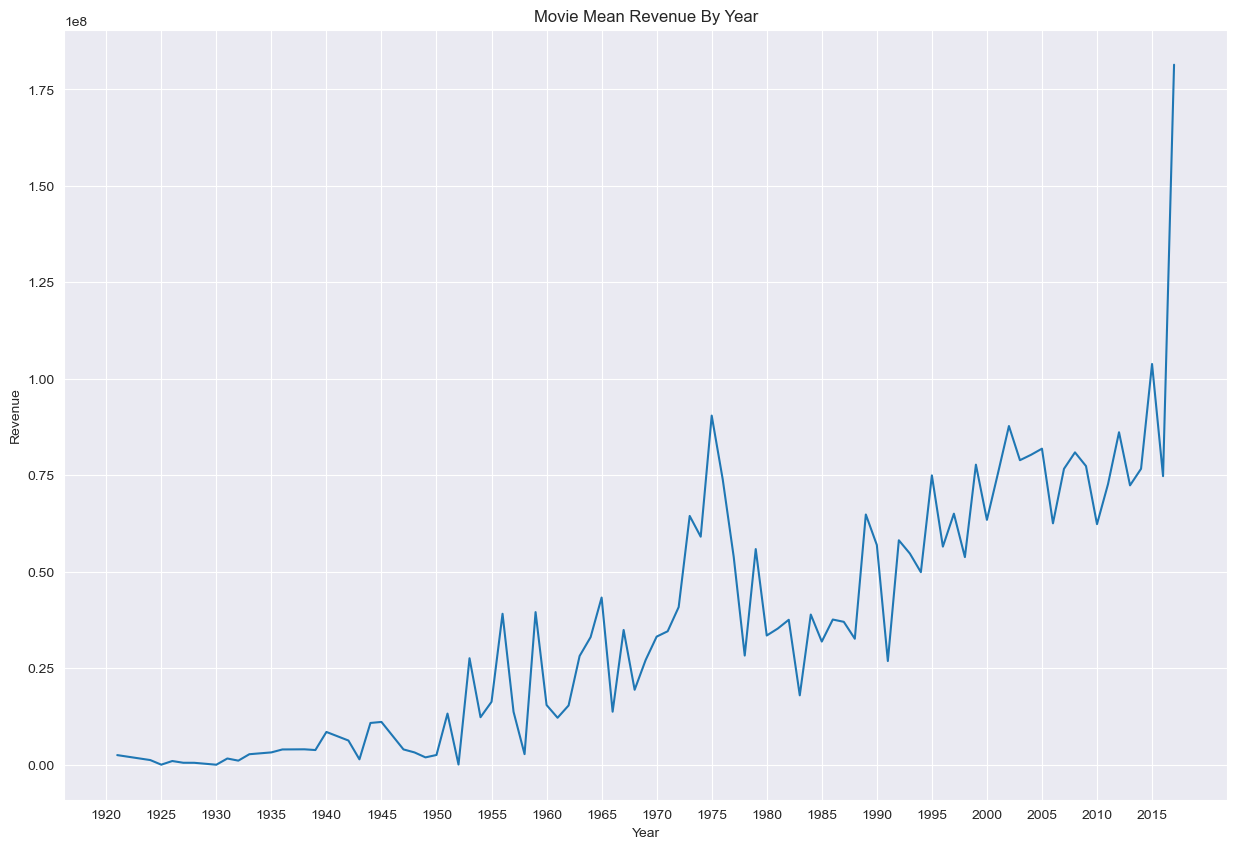

In [250]:
yearly_income.plot(figsize=(15,10))
plt.xticks(np.arange(1920,2020,5))
plt.xlabel("Year")
plt.ylabel("Revenue")
plt.title("Movie Mean Revenue By Year")
plt.show()

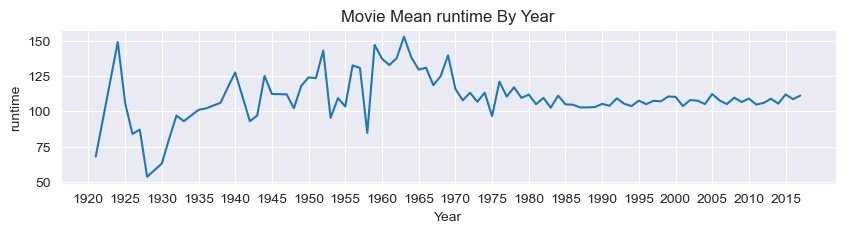

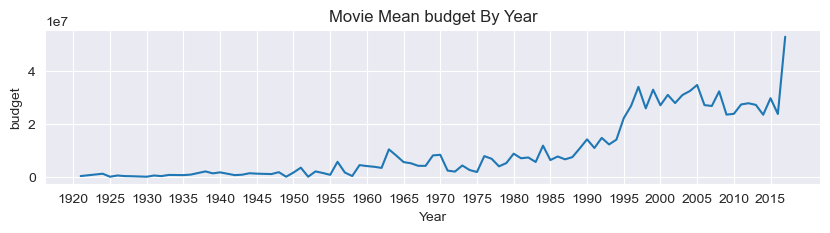

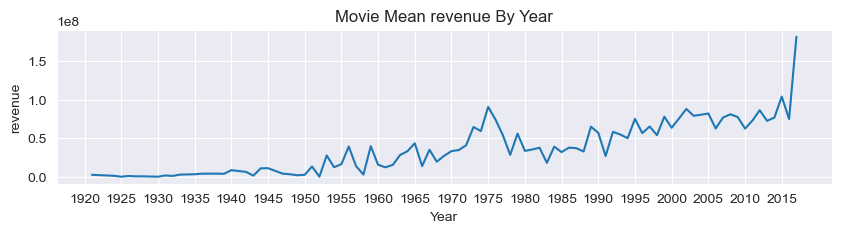

In [251]:
checked_variable = "runtime"
plotsize = (10,2)
pd.DataFrame(list(zip(train_data[checked_variable],yearlist)), columns=[checked_variable,'year']).groupby('year')[checked_variable].aggregate('mean').plot(figsize=plotsize)
plt.xticks(np.arange(1920,2020,5))
plt.xlabel("Year")
plt.ylabel(checked_variable)
plt.title(f"Movie Mean {checked_variable} By Year")
plt.show()
checked_variable = "budget"
pd.DataFrame(list(zip(train_data[checked_variable],yearlist)), columns=[checked_variable,'year']).groupby('year')[checked_variable].aggregate('mean').plot(figsize=plotsize)
plt.xticks(np.arange(1920,2020,5))
plt.xlabel("Year")
plt.ylabel(checked_variable)
plt.title(f"Movie Mean {checked_variable} By Year")
plt.show()
checked_variable = "revenue"
pd.DataFrame(list(zip(train_data[checked_variable],yearlist)), columns=[checked_variable,'year']).groupby('year')[checked_variable].aggregate('mean').plot(figsize=plotsize)
plt.xticks(np.arange(1920,2020,5))
plt.xlabel("Year")
plt.ylabel(checked_variable)
plt.title(f"Movie Mean {checked_variable} By Year")
plt.show()

In [252]:
features = ["budget", "popularity", "original_language"] # runtime kein sinnvolles feature
X = train_data[features]

In [253]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   budget             3000 non-null   int64  
 1   popularity         3000 non-null   float64
 2   original_language  3000 non-null   object 
dtypes: float64(1), int64(1), object(1)
memory usage: 70.4+ KB


In [254]:
model = SVR()
#model = RandomForestRegressor(n_estimators=100, random_state=0) 
#model = DecisionTreeRegressor()
model.fit(X, y)

ValueError: could not convert string to float: 'en'

In [225]:
 X_test = test_data[features]
# X_test = transformer.fit_transform(X_test)
predictions = model.predict(X_test)

In [226]:
predictions

array([5.58365374e+06, 3.49498366e+06, 1.39471334e+07, ...,
       2.74037726e+07, 1.05478255e+08, 6.32434043e+06])

In [227]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X, y)
print(f'Accuracy: {score.mean()}')

Accuracy: 0.5700864867791899


In [228]:
score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error')
print(f'MSE: {score.mean()}')

MSE: -89031400.27266213


In [229]:
df = pd.DataFrame(list(zip(test_data['id'], predictions)), columns=['id', 'revenue'])
df.to_csv('submission_4.csv', index=False)